In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.layers import BatchNormalization
from keras.applications.inception_v3 import InceptionV3 as icp
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
tr=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     validation_split=0.0
    )

te=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
#      validation_split=0.0
)

tr=tr.flow_from_directory(
    directory="D:\\Datasets IC\\litter_op\\train",
    target_size=(227,227),
    batch_size=20,
    class_mode='sparse',
    subset='training',
    seed=22
)

te=te.flow_from_directory(
    directory="D:\\Datasets IC\\litter_op\\val",
    target_size=(227,227),
    batch_size=20,
    class_mode='sparse',
    subset='training',
    seed=22
)

Found 5317 images belonging to 6 classes.
Found 1774 images belonging to 6 classes.


In [5]:
# tr=tf.keras.utils.image_dataset_from_directory(
#     directory=r"D:\Datasets IC\litter_op\train",
#     labels='inferred',
#     batch_size=20,
#     color_mode='rgb',
#     label_mode='int',
#     image_size=(227,227)
# )
# te=tf.keras.utils.image_dataset_from_directory(
#     directory="D:\\Datasets IC\\litter_op\\val",
#     labels='inferred',
#     batch_size=20,
#     color_mode='rgb',
#     label_mode='int',
#     image_size=(227,227),
# )

# def process(image,label):
#     image=tf.cast(image/255.,tf.float32)
#     return image,label
# trds=tr.map(process)
# valds=te.map(process)

In [6]:
base=icp(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(227,227,3),
    pooling="max",
    classes=6
  )
base.trainable=True

In [28]:
model=Sequential()

model.add(base)
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
model.add(Dense(250,activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.4))
model.add(Dense(125,activation='relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.4))
model.add(Dense(6,activation='softmax'))


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 500)               1024500   
                                                                 
 batch_normalization_97 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 250)               125250    
                                                                 
 batch_normalization_98 (Bat  (None, 250)              1000      
 chNormalization)                                     

In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,min_lr=1e-10,cooldown=4)
es=EarlyStopping(monitor='val_loss',patience=12)
# mc=ModelCheckpoint(filepath=r"D:\Models\Inception_Trainable_Base_Best_weights.h5",save_best_only=True,monitor='val_loss',save_freq='epoch',mode='min',save_weights_only=False)

In [12]:
det1=model.fit(tr,epochs=100,validation_data=te,callbacks=[lr,es])

Epoch 1/100
266/266 [==============================] - 189s 634ms/step - loss: 1.4175 - accuracy: 0.4689 - val_loss: 1.2319 - val_accuracy: 0.5637 - lr: 0.0010
Epoch 2/100
266/266 [==============================] - 55s 207ms/step - loss: 1.1035 - accuracy: 0.6017 - val_loss: 1.6839 - val_accuracy: 0.3450 - lr: 0.0010
Epoch 3/100
266/266 [==============================] - 55s 208ms/step - loss: 0.9711 - accuracy: 0.6487 - val_loss: 1.5906 - val_accuracy: 0.5676 - lr: 0.0010
Epoch 4/100
266/266 [==============================] - 56s 210ms/step - loss: 0.8776 - accuracy: 0.6816 - val_loss: 1.8712 - val_accuracy: 0.5186 - lr: 0.0010
Epoch 5/100
266/266 [==============================] - 56s 210ms/step - loss: 0.8784 - accuracy: 0.6880 - val_loss: 2.0865 - val_accuracy: 0.6359 - lr: 0.0010
Epoch 6/100
266/266 [==============================] - 56s 211ms/step - loss: 0.8163 - accuracy: 0.7030 - val_loss: 18.7700 - val_accuracy: 0.4092 - lr: 0.0010
Epoch 7/100
266/266 [=======================

In [37]:
# model.save(r"D:\Models\InceptionV3Best.h5")

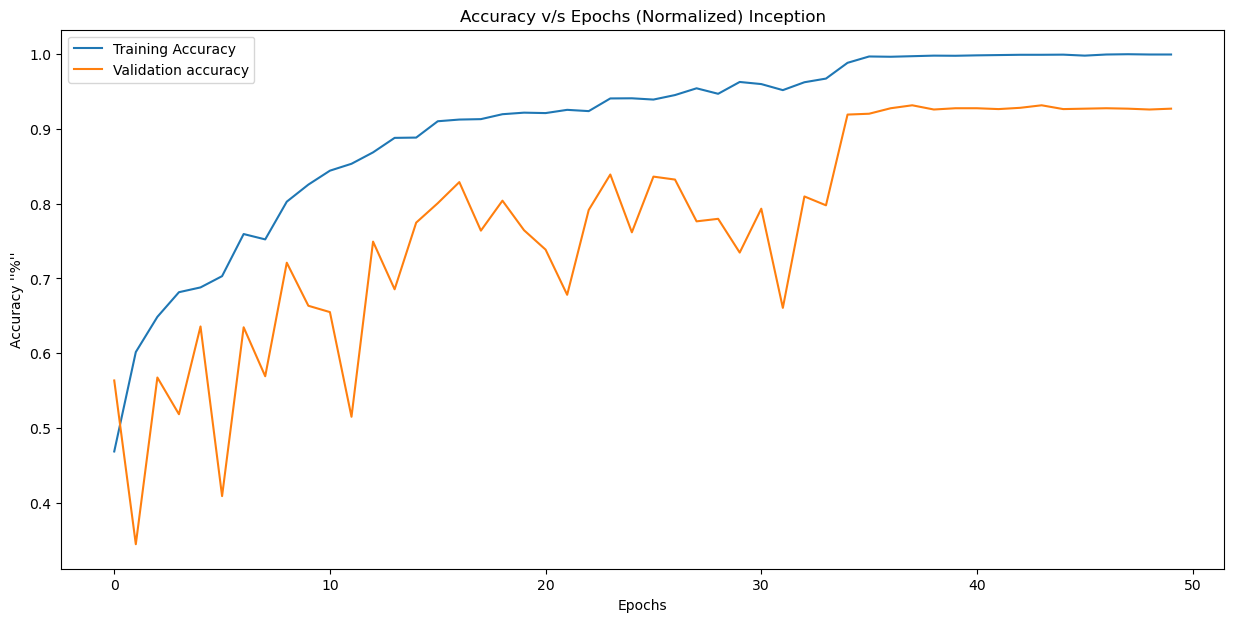

In [43]:
# plt.figure(figsize=(15,7))
# plt.plot(det1.history['accuracy'])
# plt.plot(det1.history['val_accuracy'])
# plt.xlabel('Epochs')
# plt.ylabel("Accuracy ''%''")
# plt.legend(['Training Accuracy','Validation accuracy'])
# plt.title('Accuracy v/s Epochs (Normalized) Inception')
# plt.savefig('Inception_Acc.svg')

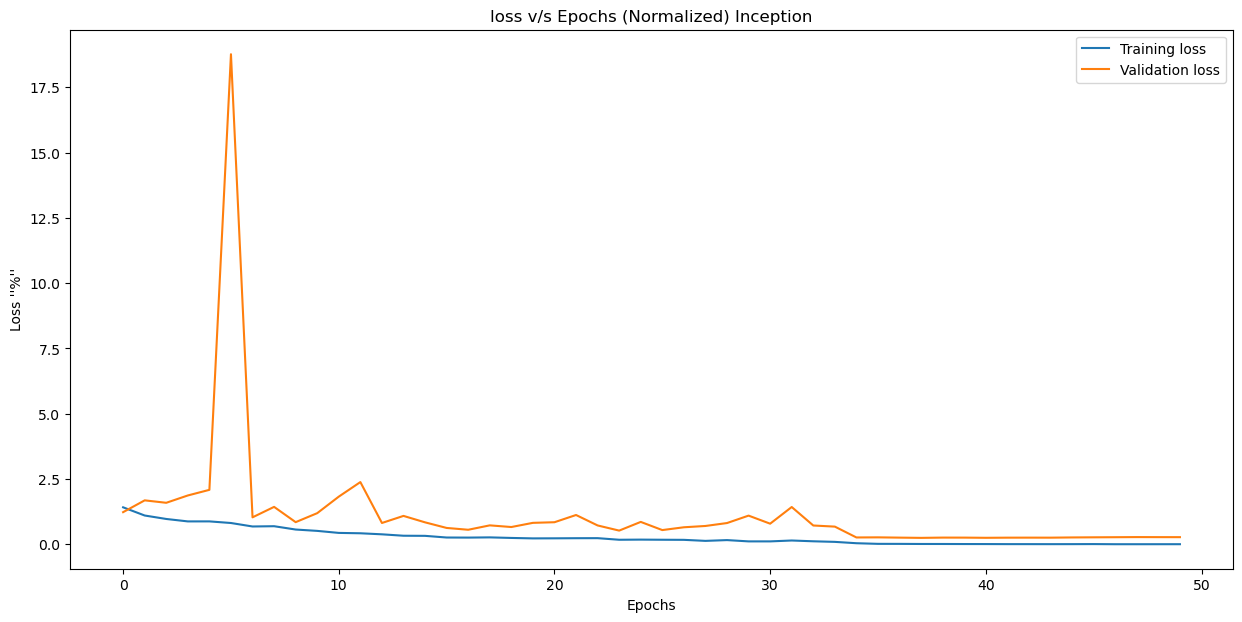

In [42]:
# plt.figure(figsize=(15,7))
# plt.plot(det1.history['loss'])
# plt.plot(det1.history['val_loss'])
# plt.xlabel('Epochs')
# plt.ylabel("Loss ''%''")
# plt.legend(['Training loss','Validation loss'])
# plt.title('loss v/s Epochs (Normalized) Inception')
# plt.savefig('Inception_loss.svg')

In [20]:
# model.save(r'D:\Models\Inception_model_Trash_Classification_end_weights.h5')

In [16]:
model.evaluate(tr)


266/266 [==============================] - 26s 96ms/step - loss: 0.0037 - accuracy: 0.9989


[0.0037053136620670557, 0.9988715648651123]

In [38]:
model.evaluate(te)

89/89 [==============================] - 9s 88ms/step - loss: 1.8734 - accuracy: 0.5158


[1.873386263847351, 0.5157835483551025]

In [35]:
m2=model
m2=keras.models.load_model(r"D:\Models\Normalized_Inception_Base_Best_weights.h5")

In [36]:
m2.evaluate(tr)
m2.evaluate(te)

89/89 [==============================] - 7s 83ms/step - loss: 0.3006 - accuracy: 0.9222


[0.30061233043670654, 0.9222096800804138]

## InceptionV1
1. Inception v1 -> Was wider rather than being deep
2. Introduced 1x1 convolution to reduce image shape

## InceptionV3
1. Around 28% reduction in paramters by dimension reduction of 5x5 conv to two 3x3 conv layers in series
2. Also factorization in Asymmetric convolutions i.e. 3x3 we replace it with 3x1 and 1x3 if two same conv is done serially of 3x3 and 3x3 then only one of them i.e. bottom one is factorized reducing params by 33%
3. 48 layer network 
4. Also has auxilary classifiers to tackle the vanishing gradient problem and their loss is added in the end

1/1 [==============================] - 0s 26ms/step
[[1.9680117e-05 3.2509583e+01 5.6536126e-01 1.5348031e-01 2.4119715e+01
  4.2651844e+01]]


5

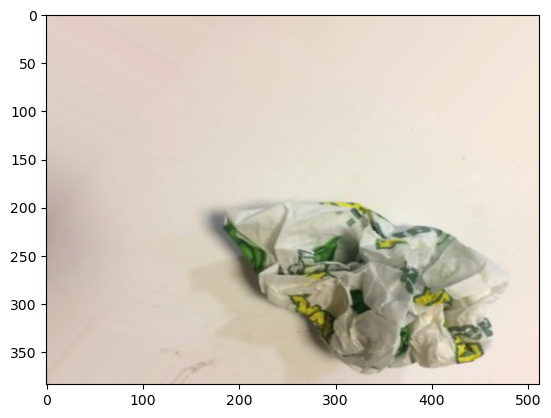

In [19]:
img=cv2.imread(r"D:\Datasets IC\litter_op\train\trash\trash0_20_9042.png")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

img=img/255.
img=cv2.resize(img,(227,227))
img=[img]
imar=np.array(img)
k=model.predict(imar)
print(k*100)
k=np.argmax(k)
k